In [1]:
import pandas as pd

In [3]:
d = {'miles_per_week': [37,39,46,51,88,17,18,20,21,22,23,24,25,27,28,29,30,31,32,33,34,38,40,42,57,68,35,36,41,43,45,47,49,50,52,53,54,55,56,58,59,60,61,63,64,65,66,69,70,72,73,75,76,77,78,80,81,82,83,84,85,86,87,89,91,92,93,95,96,97,98,99,100,101,102,103,104,105,106,107,109,110,111,113,114,115,116,116,118,119,120,121,123,124,126,62,67,74,79,90,112],
'completed_50m_ultra': ['no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','no','yes','yes','yes','yes','no','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','no','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes','yes',]}


In [4]:
df = pd.DataFrame(data=d)

In [5]:
df.head()

,miles_per_week,completed_50m_ultra
0,37,no
1,39,no
2,46,no
3,51,no
4,88,no


In [6]:
from sklearn.preprocessing import OrdinalEncoder 

In [7]:
finished_race = ['yes', 'no']

In [8]:
enc = OrdinalEncoder(categories=[finished_race])

In [9]:
df['completed_50m_ultra'] = enc.fit_transform(df[['completed_50m_ultra']])

In [10]:
df.head()

,miles_per_week,completed_50m_ultra
0,37,1.0
1,39,1.0
2,46,1.0
3,51,1.0
4,88,1.0


In [11]:
from matplotlib import pyplot as plt 

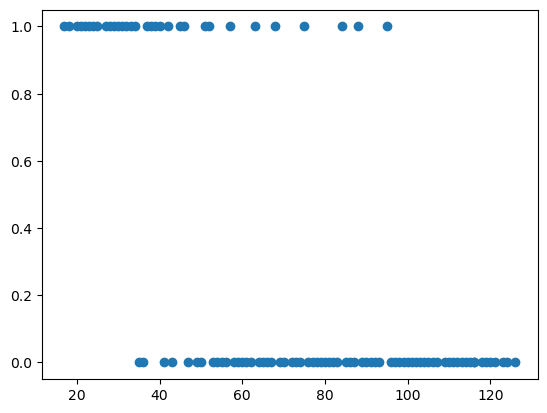

In [12]:
plt.scatter(df['miles_per_week'], df['completed_50m_ultra'])

In [13]:
import seaborn as sns

<Axes: xlabel='completed_50m_ultra', ylabel='count'>

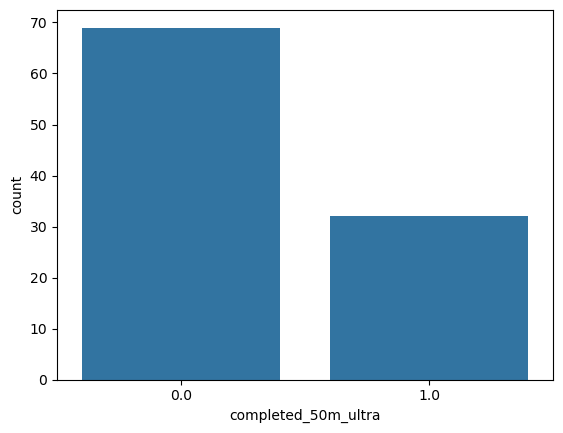

In [14]:
sns.countplot(x='completed_50m_ultra', data=df)

In [15]:
x = df.iloc[:,0:1] 
y = df.iloc[:,1]

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.8,random_state=11)

In [17]:
x_test.shape

(21, 1)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
model = LogisticRegression()

In [20]:
model.fit(x_train,y_train)

LogisticRegression()

In [21]:
y_pred = model.predict(x_test)

In [22]:
model.score(x_test,y_test)

0.9047619047619048

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
print(confusion_matrix(y_test,y_pred))

[[14  1]
 [ 1  5]]


In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93        15
         1.0       0.83      0.83      0.83         6

    accuracy                           0.90        21
   macro avg       0.88      0.88      0.88        21
weighted avg       0.90      0.90      0.90        21

